<h1 style="text-align: center;">Individual-based Simulation Models of Public Health, pt. II</h1>

<p style="text-align: center;">James Collins</p>
<p style="text-align: center;">August 8, 2019</p>

Hi everyone.  

My name is ...

This is the third presentation in a series on individual-based simulation models of public health.  

# The Simulation Science Team

I lead the engineering efforts on the simulation science team. What we do, in many ways, is similar to what happens on many other teams throughout the institute: public health modeling.

**Slide**

In particular, we try to analyze the impacts of interventions on health systems. We look at outcomes like the change in disease burden, risk exposure, and the health system costs.

**Slide**

I like to always keep in mind why we're doing what we do because it helps guide model development. 

We try to provide an agenda-free evidence base for people trying to make hard decisions.  Decisions like which studies to fund, which intervention programs to roll out, and sometimes where there are important data gaps that should be filled.

**Slide**

We produce this evidence using computer simulations of health systems.

- **What we do**: Analyze the impacts of interventions on population health and health systems.

- **Why we do it**: To give policy and decision makers evidence for intervention comparisons.

- **How we do it**: Computer simulations!

# Agenda

In the first session two weeks ago, we discussed a number of things. 

We talked about simulation broadly: what it is, and how it's done at a high level.

I gave a description of our modeling paradigm and then we began picking apart a simple risk and cause model for ischemic heart disease.

If you came last week, Nathaniel Blair-Stahn and Yongquan Xie gave a presentation about the results from a particular intervention model we produced on SQ-LNS.

**Slide**

This week, I'll give a brief recap of our modeling paradigm: individual-based, discrete-time, Monte Carlo simulation.

**Slide**

We'll talk about our concept model diagram and how we can use it to understand the causal structure of a public health model.

**Slide**

With whatever time we have remaining, we'll set up an actual simulation and see how we can ask different questions about the population in the model.

- Recap the modeling paradigm.

- The concept model diagram.

- Demo

<h1 style="text-align: center;">The Modeling Paradigm</h1>
<h3 style="text-align: center;">Individual-based, discrete-time, Monte Carlo simulations</h3>

So, let's start with the recap. We do individual-based, discrete-time, Monte Carlo simulations.  I find this is easiest to understand with pictures.

<img src="images/part_2/vivarium_simulation1.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

This is a cartoon of what a very simple vivarium simulation might look like.

This image captures two aspects of our modeling paradigm

It's individual-based, meaning we simulate actual people rather than cohorts.

It's discrete time, meaning time proceeds in a series of discrete chunks.

We can think about this in two ways:

In one, we have a collection of individuals represented by the little stick figures here. The march forward in time and sometimes they die. We only get to see things after they've happend and we've stopped to record, and so that's when we mark when events happen.

This picture has limitations though.  A single person can have many different attributes - age, alive, blood pressure, cholesterol, access to clean water, what diseases they have, etc.  

<img src="images/part_2/vivarium_simulation2.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

The more useful representation of our population is here at the bottom.  

What we're trying to talk about is the **state** of the simulation: the representation of the whole population at a particular point in time.

In our second representation, we think of a matrix or table that represents our population.  The rows of that table represent individuals and the columns represent attributes that each of those individuals have.

Our table in this model would just be an index column that identifies the individuals and a column that tells us whether each individual is alive or dead. 

The simulation produces a trajectory, or a series of simulation states.  The **model** gives us rules for how that state changes each time step.

Let's dive a little deeper and figure out how the model is responsible for altering the simulation state.

<img src="images/part_2/time_step.png" style="display: block; margin-left: auto; margin-right: auto; width: 80%">

  
Notice the little x here.  I've zoomed down to a single person (or row in our state matrix).  

Our time steps work essentially as a loop over ever person in our simulation.  This means we don't typically model thing like infectious disease dynamics.  Our focus is about **heterogeneity**.  

Within each time step, for each person, we make a series of decisions.

<h1 style="text-align: center;">So what is a decision?</h1>

<h3 style="text-align: center;">A process for asking and answering questions.</h3>

What is a decision then?

**Slide**

Simply put, a decision is the process used to ask and answer questions.

There are different kinds of questions we might ask in a simulation.

Some questions are deterministic. "How much older do I get?" for instance. Well, our time steps are a fixed width, so a person's age increases by the size of the time step as long as they're alive. 

Some questions are harder to answer though. "Do I die?", for instance. Well, maybe. Maybe not. 

For these kinds of questions, we turn to the Monte Carlo technique.

<img src="images/part_2/monte_carlo1.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

Surprisingly, it's pretty straightforward. 

We have a question and likely we have some data we can bring to bear to help answer that question. 

We use those two to create a probability that the thing happens. This is not a distribution, but an actual number between 0 and 1. 

We then do some computer magic to get a random number to "sample" that probability and determine our answer.

Okay, so I'm being a little glib and hand-wavy here. Let's look at a concrete example.

<img src="images/part_2/monte_carlo2.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

We have a question: does the individual die sometime in the next time step.  

We also have all this marvelous GBD data about mortality. 

We go to our survival analysis text books (ask Drew if you need a copy) and find a precise mathematical way to ask our question: 

What is the probability that the time of my death is within the next time step given that it's definitely after right now? 

It even has a nice math equation using our data if we're careful about our assumptions. 

Then we ask the computer for a uniform random number between 0 and 1.  If it's less than our calculated probability, the individual dies. If it's more, they don't die.



### To quickly recap

Let's recap quickly.

**Slide**

A sim is ...

**Slide**

A time step is ..

**Slide**

A decision is ..


**Stop Now for Questions**

- A **simulation** is a series of **discrete time steps** of a known size.

- A **time step** involves going to each individual and making a series of **decisions**.

- A **decision** is the process for asking and answering a question about what happens to an individual, either deterministically, or with a **Monte Carlo sample** informed by some data and a random number.

<h1 style="text-align: center;">The Concept Model Diagram</h1>

So we have a modeling paradigm.  Let's turn to applying that paradigm to a public health model.

Our team uses a tool called a concept model diagram to talk about the causal structure of models.

<img src="images/part_2/concept_model1.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

Here is a concept model diagram that describes a model of ischemic heart disease, body mass index, and their impact on mortality.

These diagrams give a modular description of the various components in a vivarium model.  

By components, we mean approximately this set of boxes we see in the diagram.  Let's take a beat and frame the responsibilities of model components.

## Understanding Model Components

Each box in our causal diagram, will typically correspond to one (or sometimes more) components in our implementation of the model.  There are a few key things to keep in mind about how components work.

**Slide**

Attributes are things like the age and sex of individuals, whether they have a particular disease, etc.  
The component that defines those attributes are primarily responsible for three things.

**Slide**

If we think back to our toy diagram of the simulation from earlier, we had a starting state X0.  That state is constructed piecemeal by the components where each component is responsible for filling in the set of columns that correspond to the attributes they manage.

**Slide**

It's almost always easiest to think about this from the perspective of an individual. If we recall our time step diagram, the component describes some subset of the decisions that happen each step.  It's important to note, the particular questions we might ask (or whether we ask them at all) may be dependent on other aspects of the current state.

**Slide**

If we're careful about how we think about our models, this can usually be done at a level of defining relationships between components, which allows us to draw these handy causal diagrams.

Let's return to our concept model diagram with this framing.

- Components are responsible for a small set of **attributes**.  

- Components must **initialize** the attributes at the start of the simulation.  

- Components must define the **decisions** that change those **attributes**.

- Components must define their **relationships** to other **attributes**.

<img src="images/part_2/concept_model2.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

Our first declaration about components is that they're responsible for modeling a small set of attributes.

Here we can see  what each component is responsible for.  Let's think back to our description of the simulation state.  This model corresponds to a simulation state that looks like the following table.

<table style="font-size:40px">
<thead>
<tr>
<th>index</th>
<th>age</th>
<th>sex</th>
<th>alive</th>
<th>cause of death</th>
<th>disease status</th>
<th>body mass index</th>
</tr>
</thead>
<tbody><tr>
<td>0</td>
<td>45.27</td>
<td>M</td>
<td>yes</td>
<td>none</td>
<td>susceptible</td>
<td>28.9</td>
</tr>
<tr>
<td>1</td>
<td>56.96</td>
<td>F</td>
<td>yes</td>
<td>none</td>
<td>susceptible</td>
<td>20.4</td>
</tr>
<tr>
<td>2</td>
<td>68.12</td>
<td>M</td>
<td>yes</td>
<td>none</td>
<td>IHD</td>
<td>41.1</td>
</tr>
<tr>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>..</td>
</tr>
<tr>
<td>4999</td>
<td>42.54</td>
<td>M</td>
<td>yes</td>
<td>none</td>
<td>susceptible</td>
<td>24.8</td>
</tr>
</tbody></table>

Here we see an example of a table that would be generated by the provided model at the start of the simulation.  There is a row for every individual and a column for each attribute that a component manages.

A good question to ask at this point is how did we get these values?

<img src="images/part_2/concept_model3.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

As I mentioned, the first responsibility of a component is to initialize the attributes it is responsible for.

Constructing a valid starting state is a sampling problem and is strongly data dependent. Luckily, the GBD provides a wonderful data source for generating the appropriate distributions.  

In nearly all situations, we start with a single joint distribution over age and sex, and then use a series of joint distributions to assign the remaining attributes.

Let's look at this process more closely.

<img src="images/part_2/pop_data.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

This is a distribution of age and sex for people over 40 in Kenya in 2005. The population component does some careful disaggregation of this data and constructs a distribution of age and sex to sample from.

<table style="font-size:40px">
<thead>
<tr>
<th>index</th>
<th>age</th>
<th>sex</th>
<th>alive</th>
<th>cause of death</th>
<th>disease status</th>
<th>body mass index</th>
</tr>
</thead>
<tbody><tr>
<td>0</td>
<td style="background:green">45.27</td>
<td style="background:green">M</td>
<td>yes</td>
<td>none</td>
<td>susceptible</td>
<td>28.9</td>
</tr>
<tr>
<td>1</td>
<td style="background:green">56.96</td>
<td style="background:green">F</td>
<td>yes</td>
<td>none</td>
<td>susceptible</td>
<td>20.4</td>
</tr>
<tr>
<td>2</td>
<td style="background:green">68.12</td>
<td style="background:green">M</td>
<td>yes</td>
<td>none</td>
<td>IHD</td>
<td>41.1</td>
</tr>
<tr>
<td>...</td>
<td style="background:green">...</td>
<td style="background:green">...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>..</td>
</tr>
<tr>
<td>4999</td>
<td style="background:green">42.54</td>
<td style="background:green">M</td>
<td>yes</td>
<td>none</td>
<td>susceptible</td>
<td>24.8</td>
</tr>
</tbody></table>

We then sample the distribution 5000 times to generate the starting age and sex of the population.

<table style="font-size:40px">
<thead>
<tr>
<th>index</th>
<th>age</th>
<th>sex</th>
<th>alive</th>
<th>cause of death</th>
<th>disease status</th>
<th>body mass index</th>
</tr>
</thead>
<tbody><tr>
<td>0</td>
<td>45.27</td>
<td>M</td>
<td style="background:green">yes</td>
<td style="background:green">none</td>
<td>susceptible</td>
<td>28.9</td>
</tr>
<tr>
<td>1</td>
<td>56.96</td>
<td>F</td>
<td style="background:green">yes</td>
<td style="background:green">none</td>
<td>susceptible</td>
<td>20.4</td>
</tr>
<tr>
<td>2</td>
<td>68.12</td>
<td>M</td>
<td style="background:green">yes</td>
<td style="background:green">none</td>
<td>chronic IHD</td>
<td>41.1</td>
</tr>
<tr>
<td>...</td>
<td>...</td>
<td>...</td>
<td style="background:green">...</td>
<td style="background:green">...</td>
<td>...</td>
<td>..</td>
</tr>
<tr>
<td>4999</td>
<td>42.54</td>
<td>M</td>
<td style="background:green">yes</td>
<td style="background:green">none</td>
<td>susceptible</td>
<td>24.8</td>
</tr>
</tbody></table>

We don't need to consult any data for the attributes that mortality is responsible for.  Our simulation starts with only living people, so everyone is alive and has no cause of death.

<img src="images/part_2/concept_model3.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

Returning to our diagram the next thing we should do is initialize disease status. We go back to GBD again, this time for prevalence data.

<img src="images/part_2/prev_data.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

I'm grabbing post-COMO data here, which means I'm only getting prevalence at the cause level.  Either you have IHD or you don't.  It is age-sex specific, which is exactly what I need, but is it sufficient to initialize my model?

Perhaps.  It depends on the complexity of my model of IHD and the assumptions I'm willing to make.  We'll look more closely at the model of IHD shortly.  For now, we'll say there are two disease statuses: susceptible, and prevalent with IHD.

Here, we'll treat the data from gbd as a simple pmf conditioned on age and sex.  If you fit in an age sex bin, this will give me a single probability that you're currently prevalent.

<table style="font-size:40px">
<thead>
<tr>
<th>index</th>
<th>age</th>
<th>sex</th>
<th>alive</th>
<th>cause of death</th>
<th>disease status</th>
<th>body mass index</th>
</tr>
</thead>
<tbody><tr>
<td>0</td>
<td>45.27</td>
<td>M</td>
<td>yes</td>
<td>none</td>
<td style="background:green">susceptible</td>
<td>28.9</td>
</tr>
<tr>
<td>1</td>
<td>56.96</td>
<td>F</td>
<td>yes</td>
<td>none</td>
<td style="background:green">susceptible</td>
<td>20.4</td>
</tr>
<tr>
<td>2</td>
<td>68.12</td>
<td>M</td>
<td>yes</td>
<td>none</td>
<td style="background:green">IHD</td>
<td>41.1</td>
</tr>
<tr>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td style="background:green">...</td>
<td>..</td>
</tr>
<tr>
<td>4999</td>
<td>42.54</td>
<td>M</td>
<td>yes</td>
<td>none</td>
<td style="background:green">susceptible</td>
<td>24.8</td>
</tr>
</tbody></table>

Nice.  We now have a joint distribution over age, sex, and disease prevalence.  

Now, we're working with a relatively simple model. Would this process work if we were modeling multiple diseases?

<img src="images/part_2/concept_model3.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

Our last bit to deal with is the body mass index.

<img src="images/part_2/bmi_dist.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

Risk exposure can be tricky.  Unlike the disease prevalence case, I don't have a number for each age/sex group, but rather a complex distribution.  The difficult part is constructing the distribution, however.  And given the fact that I'm showing you a plot of the distribution right now, we must have solved that problem already.

<table style="font-size:40px">
<thead>
<tr>
<th>index</th>
<th>age</th>
<th>sex</th>
<th>alive</th>
<th>cause of death</th>
<th>disease status</th>
<th>body mass index</th>
</tr>
</thead>
<tbody><tr>
<td>0</td>
<td>45.27</td>
<td>M</td>
<td>yes</td>
<td>none</td>
<td>susceptible</td>
<td style="background:green">28.9</td>
</tr>
<tr>
<td>1</td>
<td>56.96</td>
<td>F</td>
<td>yes</td>
<td>none</td>
<td>susceptible</td>
<td style="background:green">20.4</td>
</tr>
<tr>
<td>2</td>
<td>68.12</td>
<td>M</td>
<td>yes</td>
<td>none</td>
<td>IHD</td>
<td style="background:green">41.1</td>
</tr>
<tr>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td style="background:green">..</td>
</tr>
<tr>
<td>4999</td>
<td>42.54</td>
<td>M</td>
<td>yes</td>
<td>none</td>
<td>susceptible</td>
<td style="background:green">24.8</td>
</tr>
</tbody></table>

By constructing the bmi distribution for each age sex group and then sampling from it, we can produce a bmi value for each individual.  And our initialization is done.

**Stop for questions**

(If no one asks: I've slid an assumption by you, does anyone know what it is?)

<img src="images/part_2/concept_model4.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

The second responsiblity of components is to describe how its attributes change over time. They do this by constructing a decision process for the attributes they manage.

How much older is a fairly straightforward question.  + dt if alive

We have a strong assumption about how exposure changes over time.  The way we produced our initial BMI was to pick a percentile in the distribution for each individual.  We assume this percentile never changes.  How can we think about this assumption?  Every person has the average age/time trend to their bmi according to their starting point.  

Let's focus in on the two sets of stochastic decisions.

<img src="images/part_2/monte_carlo2.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

Recall our original example of determining whether someone dies.  What are the important inputs?

Determining whether someone get's sick or gets better is (typically) a very similar decision, using an incidence or remission rate instead.

So then what are these arrows about?  How are things connected?

<img src="images/part_2/concept_model5.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

The final responsibility of components is to declare how they connect to other pieces of the model. They do this by altering the input data to the Monte Carlo samples, effectively altering the distribution of time til X.

# How adding cause models alters the mortality model

Let's look first at the relationship between causes and mortality.  Describing these relationships gets a little math/terminology heavy, so definitely stop me if something doesn't make sense.

**Slide**

In the absence of any cause models, our core demographic model should still function correctly. To ensure that works, everyone experiences the all cause mortality rate (or ACMR).  This is like the mean of a distribution.  In the absence of other information, it's our best guess at the mortality rate a person is experiencing based on their age and sex and the current year.

**Slide**

When we add a cause to the model, we're adding in additional information.  Two things happen. First we reduce the mortality rate for everyone by the cause-specific mortality rate (the mortality rate due to the cause among the whole population). We then add back in the excess mortality rate (the mortality rate due to the cause among those with the condition) based on whether they have the disease or not.

**Slide**

This neatly extends to multiple cause models in a single simulation, which is pretty cool.

### Case 1: No cause models

$$\lambda = ACMR$$

### Case 2: One cause model

$$\lambda = ACMR - CSMR + EMR(disease\_status)$$

### Case 3: Multiple cause models

$$\lambda = ACMR - \sum_{causes}CSMR_c + \sum_{causes} EMR_c(disease\_status_c)$$

# How adding risk models alters disease incidence models

Next, let's look more closely at the relationship between risks and cause models.  

**Slide**

Just like our mortality model, in the absense of risk factors, we should still produce a valid estimates of the disease cases.  The hat here over the right hand side is to indicate that it's a value from data, just like the all cause mortality rate.  It is the mean incidence rate in a particular demographic subgroup.

**Slide**

Adding a single risk factor causes two things to happen.  We first multiply the mean incidence by 1 - population attributable fraction. The PAF is ....  This produced the risk-deleted incidence rate or the mean rate of incidence among people who are not exposed to the disease.  We then multiply this rate by the relative risk as a function of the individual's exposure to the risk factor. This may be a continuous function, as is the case with BMI, or a lookup into a table if the exposure model is categorical.

**Slide**

Like the cause-mortality relationship, this one also easily extends to multiple risks, under particular assumptions.

**Q's**

### Case 1: No risk models

$$\iota = \hat{\iota}$$

### Case 2: One risk model

$$\iota = \hat{\iota} \cdot (1-PAF) \cdot RR(exposure)$$

### Case 3: Multiple risk models

$$\iota = \hat{\iota} \cdot (1 - \prod_{risks} (1 - PAF_r)) \cdot \prod_{risks} RR_r(exposure_r)$$

<h1 style="text-align: center;">Demo</h1>

In this last section, I'm going to show you how we set up and run a simulation. We'll then see if we can explore the relationships between these components in our model.

<img src="images/part_2/concept_model1.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

When we're planning and building our models, we use these concept model diagrams to represent all the components and their connections.  In the simulation implementation, we have a file we call the model specification.  It serves as the top level interface for interacting with simulation models.

It lists all the components that go into the model and details any configuration for those components.

Here's the component section of our model specification.  As we can see it very closely mirrors the diagram.  This is not an accident.  A large part of building good software tools is about building intelligible and familiar interfaces.

The second section of our model specification is the configuration block. It describes the various configuration paramters for the components.

**Drop back to notebook view**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
%%HTML
<style>
.rendered_html table {
    font-size: 15px
}
</style>

In [3]:
from vivarium.interface import initialize_simulation_from_model_specification
import utilities as util

In [4]:
util.disease_model_spec

'/home/collijk/vivarium-demo/2019_07_25_ihme/disease_model.yaml'

In [5]:
sim = initialize_simulation_from_model_specification(util.disease_model_spec)

In [6]:
sim.configuration.input_data.artifact_path = util.artifact_path

In [7]:
sim.setup()

/home/collijk/miniconda3/envs/vdemo/lib/python3.6/site-packages/risk_distributions/risk_distributions.py:416: RuntimeWarning: overflow encountered in double_scalars
  return (m - mean_guess) ** 2 + (s ** 2 - var_guess) ** 2
/home/collijk/miniconda3/envs/vdemo/lib/python3.6/site-packages/vivarium_public_health/population/data_transformations.py:165: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  pop_data = pd.concat([lower_bin, pop_data, upper_bin]).reset_index()


In [8]:
pop = sim.get_population()

In [9]:
pop.head(10)

,tracked,alive,entrance_time,exit_time,sex,location,age,cause_of_death,years_of_life_lost,ischemic_heart_disease,susceptible_to_ischemic_heart_disease_event_count,susceptible_to_ischemic_heart_disease_event_time,ischemic_heart_disease_event_time,ischemic_heart_disease_event_count
0,True,alive,2010-06-04,NaT,Male,Kenya,45.476411,not_dead,0.0,susceptible_to_ischemic_heart_disease,0,NaT,NaT,0
1,True,alive,2010-06-04,NaT,Female,Kenya,55.243892,not_dead,0.0,susceptible_to_ischemic_heart_disease,0,NaT,NaT,0
2,True,alive,2010-06-04,NaT,Male,Kenya,61.978080,not_dead,0.0,susceptible_to_ischemic_heart_disease,0,NaT,NaT,0
3,True,alive,2010-06-04,NaT,Male,Kenya,76.042078,not_dead,0.0,ischemic_heart_disease,0,NaT,2010-06-04,0
4,True,alive,2010-06-04,NaT,Female,Kenya,58.979431,not_dead,0.0,susceptible_to_ischemic_heart_disease,0,NaT,NaT,0
5,True,alive,2010-06-04,NaT,Female,Kenya,77.699578,not_dead,0.0,susceptible_to_ischemic_heart_disease,0,NaT,NaT,0
6,True,alive,2010-06-04,NaT,Female,Kenya,69.784450,not_dead,0.0,susceptible_to_ischemic_heart_disease,0,NaT,NaT,0
7,True,alive,2010-06-04,NaT,Male,Kenya,47.107711,not_dead,0.0,susceptible_to_ischemic_heart_disease,0,NaT,NaT,0
8,True,alive,2010-06-04,NaT,Male,Kenya,40.753312,not_dead,0.0,susceptible_to_ischemic_heart_disease,0,NaT,NaT,0
9,True,alive,2010-06-04,NaT,Female,Kenya,60.188247,not_dead,0.0,susceptible_to_ischemic_heart_disease,0,NaT,NaT,0


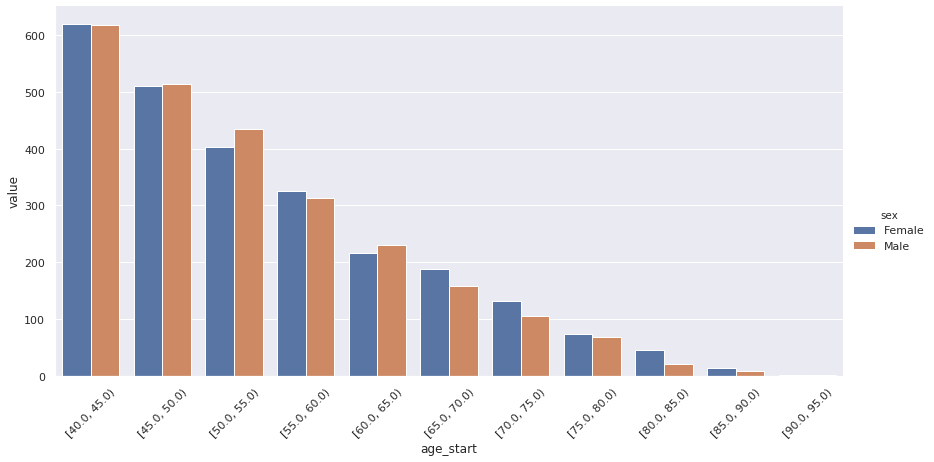

In [10]:
util.plot_pop_sim(sim)

In [11]:
pop.loc[:, 'ihd'] = sim.get_value('ischemic_heart_disease.incidence_rate')(pop.index)

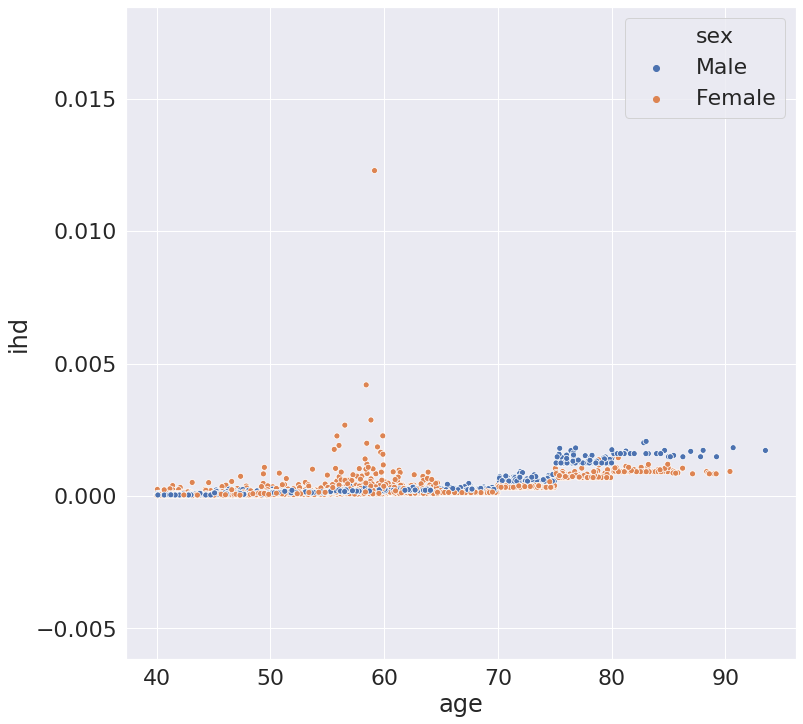

In [12]:
plt.figure(figsize=(12,12))
sns.set(font_scale=2)
sns.scatterplot(x='age', y='ihd', hue='sex', data=pop)

In [13]:
pop.loc[:, 'bmi'] = sim.get_value('high_body_mass_index_in_adults.exposure')(pop.index)